## Open Parking and Camera Violations
### Notebook 1
### NYC OpenData
### Provided by Department of Finance (DOF)

In [1]:
# The code was removed by Watson Studio for sharing.

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200418205728-0000
KERNEL_ID = 75fe70dd-0701-49c8-b110-25128ee55199


[Row(Plate='126798R', State='NJ', License Type='PAS', Summons Number='8604887570', Issue Date='05/17/2018', Violation Time='04:12P', Violation='FIRE HYDRANT', Judgment Entry Date=None, Fine Amount='115.00', Penalty Amount='10.00', Interest Amount='0.00', Reduction Amount='0.00', Payment Amount='0.00', Amount Due='125.00', Precinct='115', County='Q', Issuing Agency='TRAFFIC', Violation Status=None, Summons Image='View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSWmQwNUVaelJPZWxVelRVRTlQUT09&locationName=_____________________)'),
 Row(Plate='HJZ2125', State='PA', License Type='PAS', Summons Number='8604887738', Issue Date='05/22/2018', Violation Time='02:44P', Violation='NO PARKING-DAY/TIME LIMITS', Judgment Entry Date=None, Fine Amount='60.00', Penalty Amount='10.00', Interest Amount='0.00', Reduction Amount='0.00', Payment Amount='0.00', Amount Due='70.00', Precinct='109', County='Q', Issuing Agency='TRAFFIC', Violation Status=None, Summons Image='View Summons (htt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import (dayofmonth, dayofyear, month, year, weekofyear, to_date, col)

%matplotlib inline

In [3]:
data = df_data_1

## Initial Data Exploration

In [4]:
data.columns

['Plate',
 'State',
 'License Type',
 'Summons Number',
 'Issue Date',
 'Violation Time',
 'Violation',
 'Judgment Entry Date',
 'Fine Amount',
 'Penalty Amount',
 'Interest Amount',
 'Reduction Amount',
 'Payment Amount',
 'Amount Due',
 'Precinct',
 'County',
 'Issuing Agency',
 'Violation Status',
 'Summons Image']

In [5]:
# select numeric columns
df_1 = data.select('Fine Amount',
 'Penalty Amount',
 'Interest Amount',
 'Reduction Amount',
 'Payment Amount',
 'Amount Due',
 'Precinct')

In [6]:
df_1.select('Payment Amount').count()

47628488

### Statistics and Data Quality Assement of Numeric Columns

In [7]:
df_1.describe().toPandas()

,summary,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct
0,count,44501885,44501885,44501885,44501885,44501885,44501885,44501885
1,mean,71.46582177361701,14.179211846868958,3.293749686783037,9.361178155261326,61.14971701108967,18.431805211396608,45.50644364839827
2,stddev,31.356891305229144,21.70940543700734,13.247130884507142,26.246222484629346,47.38082593021929,49.47065966391702,41.36592348114962
3,min,0.00,0.00,0.00,0.00,0.00,0.00,000
4,max,99.00,60.00,99.99,99.98,99.99,99.99,990


In [8]:
# selected string columns
df_2 = data.select( 'State',
 'License Type',
 'Issue Date',
 'Violation',
 'Judgment Entry Date',
 'County',
 'Issuing Agency')


## Data Quality Assement of String Columns

In [9]:
df_2.describe().toPandas()

,summary,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,County,Issuing Agency,Violation Status,Summons Image
0,count,47628197,47628488,47628488,47628488,47628474,44499627,44497942,8422865,43886768,44500405,12845903,47628488
1,mean,Infinity,99.0,999.0,7.084669852435394E9,None,None,None,None,None,None,None,None
2,stddev,NaN,0.0,1.1014463175292688E-13,2.3179060063226466E9,None,None,None,None,None,None,None,None
3,min,#1DAD,99,999,1000752239,01/01/2000,-8:38A,ALTERING INTERCITY BUS PERMIT,01/02/2003,BK,BOARD OF ESTIMATE,ADMIN CLAIM DENIED,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,max,x88HEU,YT,WUG,982697648,99/02/2015,: P,WRONG WAY,12/31/2098,USA,TRIBOROUGH BRIDGE AND TUNNEL POLICE,HEARING WAIVED,View Summons (http://nycserv.nyc.gov/NYCServWe...


#### Judgment Entry Date has the least number of rows.
#### Nonsensical dates : 99/02/2015 and 12/31/2098	

## Data Exploration

In [10]:
state_count = data.groupBy('State').count().orderBy(col('count').desc()).toPandas()

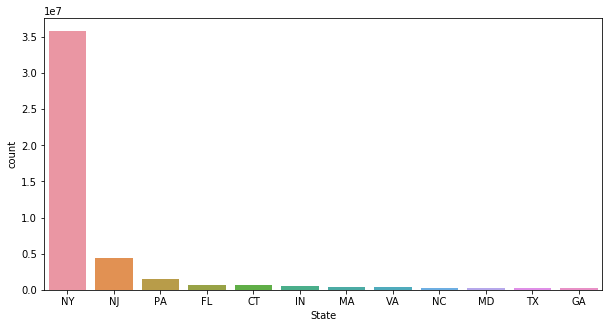

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='State',y='count',data=state_count[:12])

In [12]:
License_Type_count =  data.groupBy('License Type').count().orderBy(col('count').desc()).toPandas()

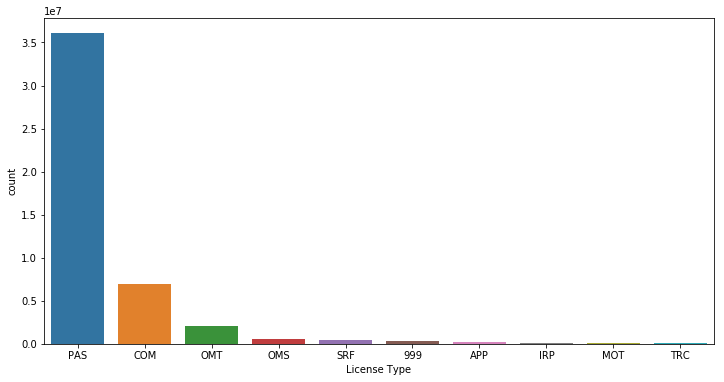

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='License Type',y='count',data=License_Type_count[:10])

In [14]:
violation_count = data.groupBy('Violation').count().orderBy(col('count').desc()).toPandas()

In [15]:
violation_count[:11]['Violation']

0         NO PARKING-STREET CLEANING
1     PHTO SCHOOL ZN SPEED VIOLATION
2     FAIL TO DSPLY MUNI METER RECPT
3        NO STANDING-DAY/TIME LIMITS
4                               None
5         NO PARKING-DAY/TIME LIMITS
6      INSP. STICKER-EXPIRED/MISSING
7                       FIRE HYDRANT
8       FAILURE TO STOP AT RED LIGHT
9                 EXPIRED MUNI METER
10                    DOUBLE PARKING
Name: Violation, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

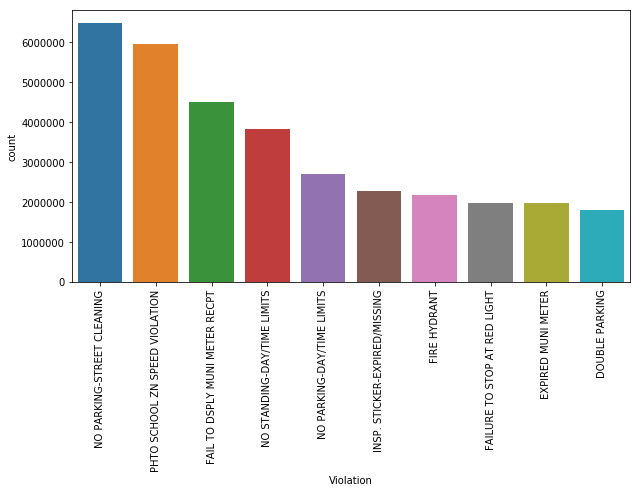

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='Violation',y='count',data=violation_count[:11])
plt.xticks(rotation=90)

In [17]:
county_count = data.groupBy('County').count().orderBy(col('count').desc()).toPandas()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

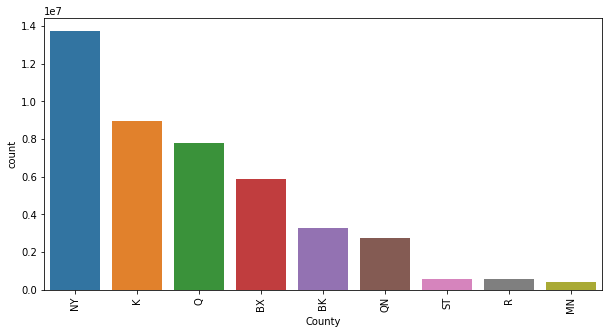

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='County',y='count',data=county_count[:10])
plt.xticks(rotation=90)

In [19]:
Issuing_Agency_count = data.groupBy('Issuing Agency').count().orderBy(col('count').desc()).toPandas()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

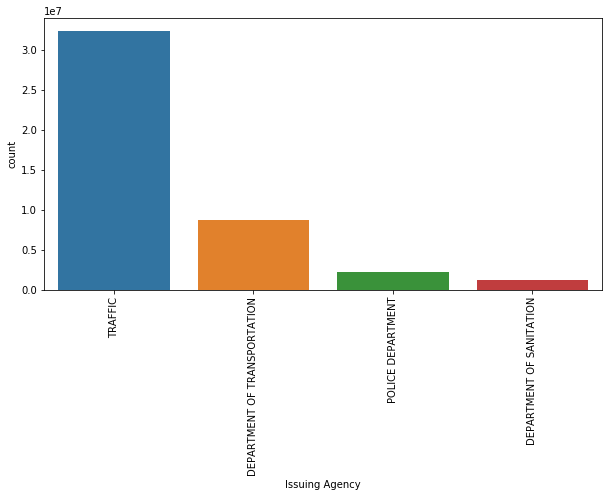

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Issuing Agency',y='count',data=Issuing_Agency_count[:5])
plt.xticks(rotation=90)

## Yearly Payment Amount

In [21]:
df_3 = data.withColumn("Issue Date",to_date("Issue Date","MM/dd/yyyy"))

In [22]:
df_4 = df_3.withColumn('Year',year(df_3['Issue Date']))

In [23]:
df_4.select('Issue Date','Year').show(5)

+----------+----+
|Issue Date|Year|
+----------+----+
|2018-05-17|2018|
|2018-05-22|2018|
|2018-05-22|2018|
|2018-05-28|2018|
|2018-06-13|2018|
+----------+----+
only showing top 5 rows



In [24]:
# cast Payment Amount as double to be able to apply the aggregate function sum
df_5 = df_4.withColumn('Payment_Amount',df_4['Payment Amount'].cast("double"))

In [25]:
df_6 = df_5.groupBy('Year').sum('Payment_Amount').orderBy('Year').na.drop().toPandas()

In [26]:
# convert the sum of payment amount to million
df_6['sum_Payment_million']= df_6['sum(Payment_Amount)']/1e6

In [27]:
df_6[15:20]

,Year,sum(Payment_Amount),sum_Payment_million
15,2015,3.577380e+07,35.773797
16,2016,5.160494e+08,516.049450
17,2017,7.067113e+08,706.711295
18,2018,7.333409e+08,733.340902
19,2019,6.819447e+08,681.944666


Text(0, 0.5, 'Payment Amount (million)')

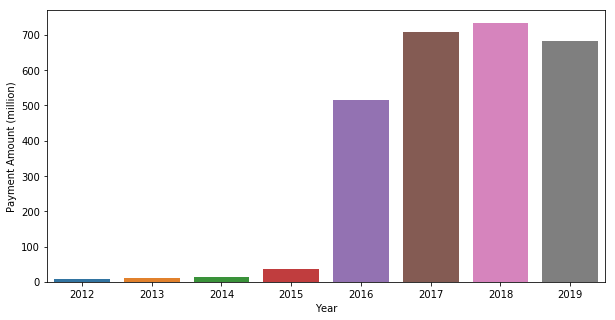

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='sum_Payment_million',data=df_6[12:20])
plt.ylabel('Payment Amount (million)')

## Correlations

In [29]:
df_7 = df_1.sample(True,0.0001)

In [31]:
df_8 = df_7.withColumn('Fine_Amount',df_7['Fine Amount'].cast("double"))\
                .withColumn('Penalty_Amount',df_7['Penalty Amount'].cast("double"))\
                    .withColumn('Interest_Amount',df_7['Interest Amount'].cast("double"))\
                        .withColumn('Payment_Amount',df_7['Payment Amount'].cast("double"))\
                            .withColumn('Amount_Due',df_7['Amount Due'].cast("double"))\
                                .withColumn('Precinct_1',df_7['Precinct'].cast("integer"))

In [32]:
df_9 = df_8.select('Fine_Amount',
 'Penalty_Amount',
 'Interest_Amount',
 'Payment_Amount',
 'Amount_Due')

In [33]:
df_10 = df_9.toPandas()

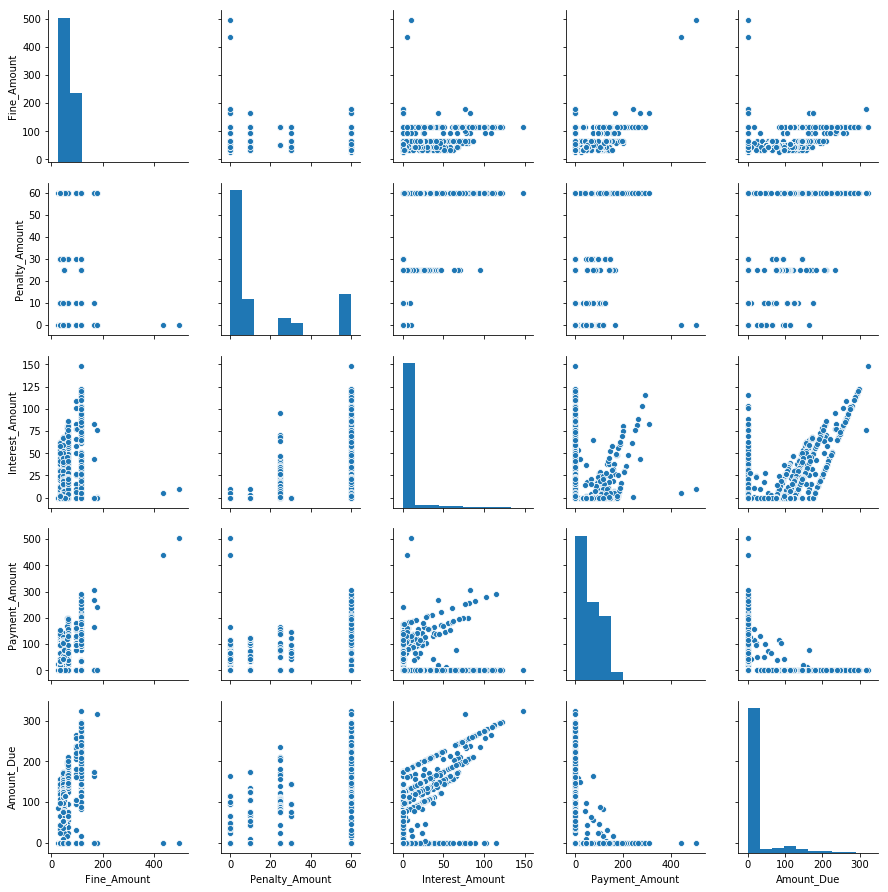

In [34]:
sns.pairplot(df_10.dropna())

(5, 0)

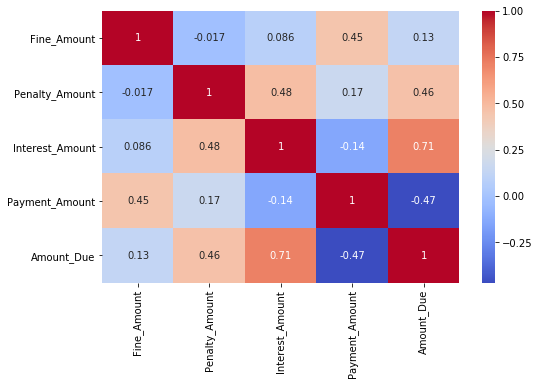

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(df_10.corr(),annot=True,cmap='coolwarm')
plt.ylim(5,0)

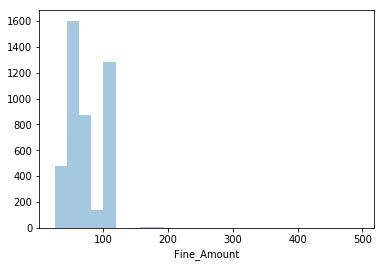

In [36]:
sns.distplot(df_10.dropna()['Fine_Amount'],kde=False,bins=25)

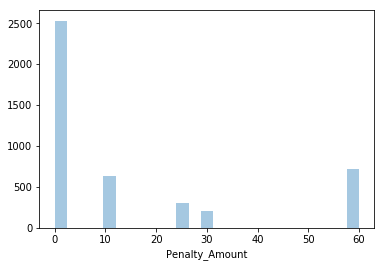

In [37]:
sns.distplot(df_10.dropna()['Penalty_Amount'],kde=False, bins=25)

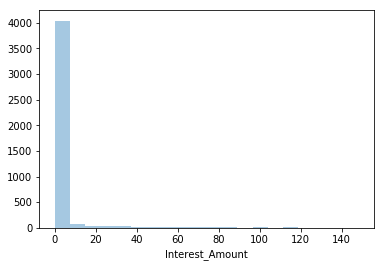

In [38]:
sns.distplot(df_10.dropna()['Interest_Amount'],kde=False,bins=20,hist_kws={'log':False})

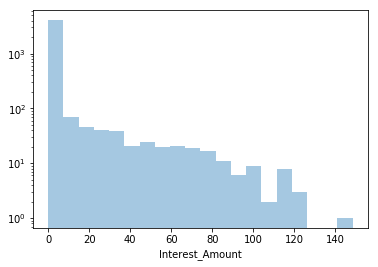

In [39]:
sns.distplot(df_10.dropna()['Interest_Amount'],kde=False,bins=20,hist_kws={'log':True})

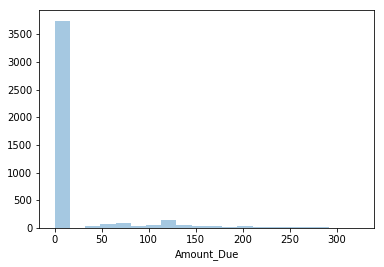

In [40]:
sns.distplot(df_10.dropna()['Amount_Due'],kde=False,bins=20,hist_kws={'log':False})

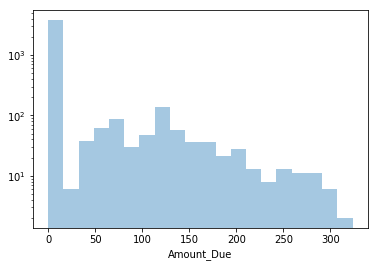

In [41]:
sns.distplot(df_10.dropna()['Amount_Due'],kde=False,bins=20,hist_kws={'log':True})